In [1]:
import time  # for execution time comparison

import matplotlib.pyplot as plt  # for display purposes
import my_plotter
import ruptures as rpt  # our package
from ruptures.metrics import hausdorff
import pandas as pd
infile="/Users/irffanalahi/Research/Research_code/gitignorefolder/DMRrelated/ITGAE_patternrecognition/changepointtest/ITGAEp_cin_nr0.5_imputed_rowmean_diif.txt"
indf=pd.read_csv(infile,sep="\t",index_col=0)
minCpG=2
indf.head()

,CD8TIL-others
position,
chr17:3800170,-0.430697
chr17:3800341,-0.371307
chr17:3800417,-0.313747
chr17:3800454,-0.329560
chr17:3800480,-0.205080


In [2]:
signal=indf.to_numpy()
n_bkps=2

(<Figure size 720x180 with 1 Axes>,
 [<matplotlib.axes._subplots.AxesSubplot at 0x7fd898007ef0>])

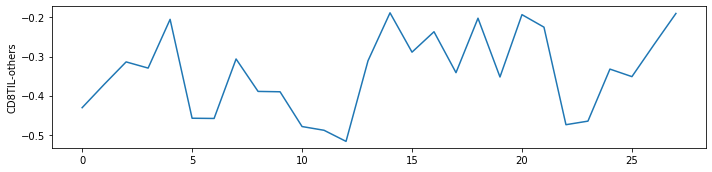

In [3]:
bkps=[12,23]

my_plotter.display(indf,bkps)

In [4]:
algo_python = rpt.Dynp(model="l2", jump=1, min_size=minCpG).fit(
    signal
)  # written in pure python
algo_c = rpt.KernelCPD(kernel="linear", min_size=minCpG).fit(signal)  # written in C

for (label, algo) in zip(
    ("Python implementation", "C implementation"), (algo_python, algo_c)
):
    start_time = time.time()
    result = algo.predict(n_bkps=n_bkps)
    print(f"{label}:\t{time.time() - start_time:.3f} s")

Python implementation:	0.009 s
C implementation:	0.000 s


In [5]:
bkps_python = algo_python.predict(n_bkps=n_bkps)
bkps_c = algo_c.predict(n_bkps=n_bkps)
print(f"Python implementation:\t{bkps_python}")
print(f"C implementation:\t{bkps_c}")
print(f"(Hausdorff distance: {hausdorff(bkps_python, bkps_c):.0f} samples)")

Python implementation:	[10, 13, 28]
C implementation:	[10, 13, 28]
(Hausdorff distance: 0 samples)


In [6]:
params = {"gamma": 1e-2}
algo_python = rpt.Dynp(model="rbf", params=params, jump=1, min_size=minCpG).fit(
    signal
)  # written in pure python
algo_c = rpt.KernelCPD(kernel="rbf", params=params, min_size=minCpG).fit(
    signal
)  # written in C

for (label, algo) in zip(
    ("Python implementation", "C implementation"), (algo_python, algo_c)
):
    start_time = time.time()
    result = algo.predict(n_bkps=n_bkps)
    print(f"{label}:\t{time.time() - start_time:.3f} s")

Python implementation:	0.004 s
C implementation:	0.000 s


In [7]:
bkps_python = algo_python.predict(n_bkps=n_bkps)
bkps_c = algo_c.predict(n_bkps=n_bkps)
print(f"Python implementation:\t{bkps_python}")
print(f"C implementation:\t{bkps_c}")
print(f"(Hausdorff distance: {hausdorff(bkps_python, bkps_c):.0f} samples)")

Python implementation:	[7, 14, 28]
C implementation:	[2, 8, 28]
(Hausdorff distance: 6 samples)


In [8]:
#####PELT#####
algo_python = rpt.Pelt(model="l2", jump=1, min_size=minCpG).fit(
    signal
)  # written in pure python
algo_c = rpt.KernelCPD(kernel="linear", min_size=minCpG).fit(
    signal
)  # written in C, same class as before


penalty_value = 100  # beta

for (label, algo) in zip(
    ("Python implementation", "C implementation"), (algo_python, algo_c)
):
    start_time = time.time()
    result = algo.predict(pen=penalty_value)
    print(f"{label}:\t{time.time() - start_time:.3f} s")

Python implementation:	0.012 s
C implementation:	0.000 s


In [9]:
bkps_python = algo_python.predict(pen=penalty_value)
bkps_c = algo_c.predict(pen=penalty_value)
print(f"Python implementation:\t{bkps_python}")
print(f"C implementation:\t{bkps_c}")
#print(f"(Hausdorff distance: {hausdorff(bkps_python, bkps_c):.0f} samples)")

Python implementation:	[28]
C implementation:	[28]


In [10]:
#fig,_=my_plotter.display(indf, bkps, bkps_python)
#plt.show()
#fig.savefig(infile+"_linearresult"+str(minCpG)+".pdf")

In [11]:
algo_python = rpt.Pelt(model="rbf", jump=1, min_size=minCpG).fit(
    signal
)  # written in pure python
algo_c = rpt.KernelCPD(kernel="rbf", min_size=minCpG).fit(
    signal
)  # written in C, same class as before


penalty_value = 1  # beta

for (label, algo) in zip(
    ("Python implementation", "C implementation"), (algo_python, algo_c)
):
    start_time = time.time()
    result = algo.predict(pen=penalty_value)
    print(f"{label}:\t{time.time() - start_time:.3f} s")

Python implementation:	0.003 s
C implementation:	0.000 s


In [12]:
bkps_python = algo_python.predict(pen=penalty_value)
bkps_c = algo_c.predict(pen=penalty_value)
print(f"Python implementation:\t{bkps_python}")
print(f"C implementation:\t{bkps_c}")
print(f"(Hausdorff distance: {hausdorff(bkps_python, bkps_c):.0f} samples)")

Python implementation:	[10, 13, 22, 24, 28]
C implementation:	[10, 13, 22, 24, 28]
(Hausdorff distance: 0 samples)


In [13]:


forindexgenerate=bkps_python
if forindexgenerate[-1]==len(indf.index):
    print("hereeeee")
    forindexgenerate[-1]=forindexgenerate[-1]-1
indf.index[forindexgenerate]


hereeeee


Index(['chr17:3800956', 'chr17:3801162', 'chr17:3801494', 'chr17:3801514',
       'chr17:3801628'],
      dtype='object', name='position')

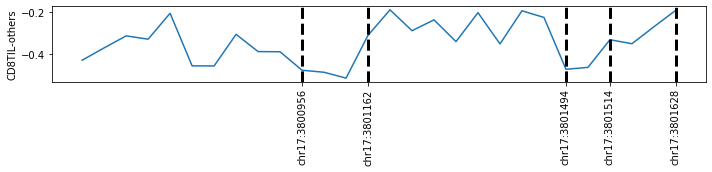

In [14]:
fig,_=my_plotter.display(indf, bkps, bkps_python)
plt.show()
fig.savefig(infile+"_RBFresult"+str(minCpG)+".pdf")